<a href="https://colab.research.google.com/github/avyaktawrat/SHALA2020/blob/master/Assignments/Machine_Learning/ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

# Solution

## Loading the dataset

In [0]:
import pandas as pd

In [31]:
url = "https://github.com/avyaktawrat/SHALA2020/raw/master/Assignments/Machine_Learning/data/titanic.csv"

titanic_data = pd.read_csv(url)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
titanic_data.shape

(891, 12)

## Exploratory Data Analysis

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

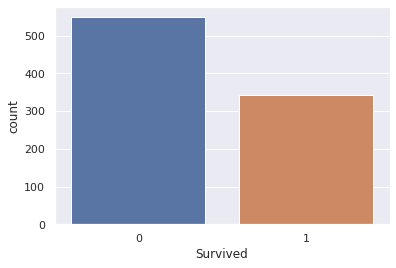

In [34]:
sns.countplot(x="Survived", data=titanic_data)
plt.show()

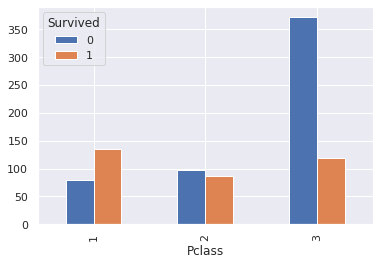

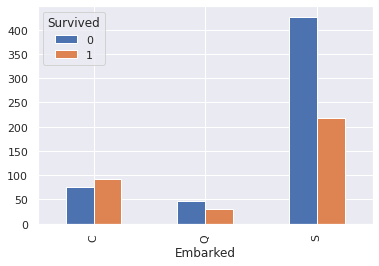

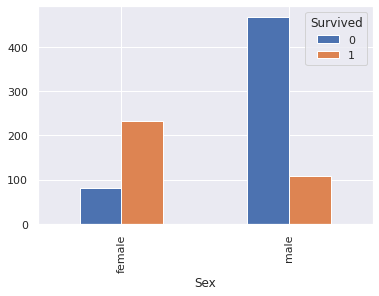

In [35]:
crt = pd.crosstab(titanic_data['Pclass'], titanic_data['Survived'])
crt1 = pd.crosstab(titanic_data['Embarked'], titanic_data['Survived'])
crt2 = pd.crosstab(titanic_data['Sex'], titanic_data['Survived'])

crt.plot.bar()
crt1.plot.bar()
crt2.plot.bar()

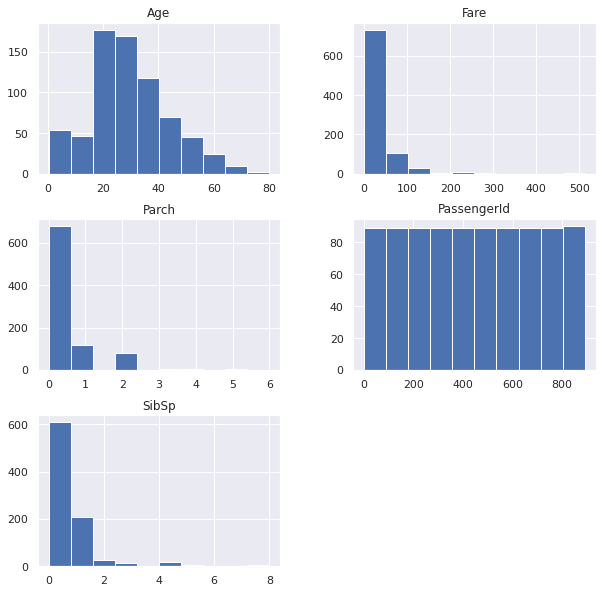

In [36]:
# titanic_data.plot.hist()
sns.set(style="darkgrid")
ax2 = titanic_data.drop(['Survived','Pclass'],axis=1).hist(figsize=(10,10))

In [37]:
ticket = pd.crosstab(titanic_data['Ticket'], titanic_data['Survived'])
ticket.shape

(681, 2)

## Data Preprocessing

1.   Creating a new dataset data, after dropping name ,passenger ID, Ticket
2.   Further dropping Cabin due to large number of null values
3.   One hot encoding/ labelling categorical data
4.   Removing null values from data or replacing them with appropriate data

In [38]:
data = titanic_data.drop(['Name','PassengerId','Ticket'],axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [39]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [0]:
data = data.drop(['Cabin'],axis=1)

In [0]:
## replacing Embark null value with the mode of the data
## replacing age null value with the median

data['Embarked'].fillna((data['Embarked'].mode())[0],inplace=True)
data['Age'].fillna((data['Age'].median()),inplace=True)

In [42]:
## One hot encoding Embarked, Sex, Pclass

data_dummy = pd.get_dummies(data,drop_first=True)

data_dummy.drop('Pclass', axis = 1, inplace=True)
data_dummy = pd.concat((data_dummy, pd.get_dummies(data['Pclass'],drop_first=True, prefix='Pclass')),axis=1)
data_dummy.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [0]:
X = data_dummy.drop(['Survived'],axis = 1)
y = data_dummy['Survived']

## Classifiers

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

### Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
# Instantiate a DecisionTreeClassifier 'dt'
dt = DecisionTreeClassifier(max_depth = 7, random_state=1) 
# dt = DecisionTreeClassifier(max_depth=6, criterion='gini', random_state=1)
# default=gini

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [47]:
# Predict test set labels
y_pred = dt.predict(X_test)
# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)

# Compute train accuracy
y_pred_train = dt.predict(X_train)
acc1 = accuracy_score(y_train, y_pred_train)

print("Decision Tree Classifier")
print("Train set accuracy: {:.2f} %".format(acc1*100))
print("Test set accuracy: {:.2f} %".format(acc*100))
print('Roc_auc_score on test set: {:.2f} %'.format(roc_auc_score(y_test, dt.predict(X_test))*100))

Decision Tree Classifier
Train set accuracy: 87.78 %
Test set accuracy: 82.68 %
Roc_auc_score on test set: 79.97 %


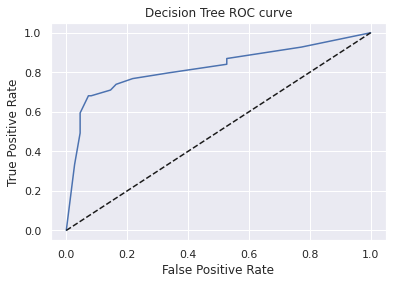

In [48]:
from sklearn.metrics import roc_curve  
probs = dt.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')
# show the plot
plt.show()

### Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
# Instantiating the classifier 
rfr = RandomForestClassifier(n_estimators=35,
                            random_state=1111,
                            max_features=4,
                            min_samples_split = 6
                            )

# Fitting the instantiator 
rfr.fit(X_train, y_train)

# Printing the training and testing accuracies 
print('The training error is {0:.2f}'.format(mean_absolute_error(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(mean_absolute_error(y_test, rfr.predict(X_test))))
rfr.get_params()

The training error is 0.07
The testing error is 0.16


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 35,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1111,
 'verbose': 0,
 'warm_start': False}

In [64]:
print('Random Forest Classifier')
print('The training accuracy is {0:.2f} %'.format(accuracy_score(y_train, rfr.predict(X_train))*100))
print('The testing accuracy is {0:.2f} %'.format(accuracy_score(y_test, rfr.predict(X_test))*100))
print('Roc_auc_score on test set: {:.2f} %'.format(roc_auc_score(y_test, rfr.predict(X_test))*100))

Random Forest Classifier
The training accuracy is 92.98 %
The testing accuracy is 84.36 %
Roc_auc_score on test set: 82.95 %


In [52]:
print(confusion_matrix(y_test, rfr.predict(X_test)))
print("="*60)
print(classification_report(y_test, rfr.predict(X_test)))

[[98 12]
 [16 53]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       110
           1       0.82      0.77      0.79        69

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



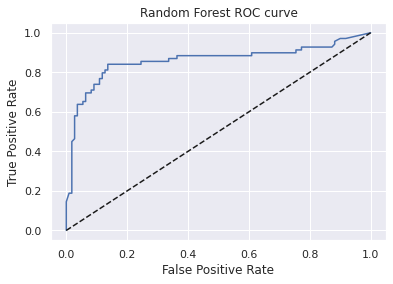

In [53]:
from sklearn.metrics import roc_curve  
probs = rfr.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
# show the plot
plt.show()

### XGB Classifier

In [0]:
import xgboost as xgb

In [55]:
# Instantiating the classifier and fitting it 
xgb_clf = xgb.XGBClassifier(learning_rate=0.05)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [56]:
print('XGB')
print('The training accuracy is {0:.2f} %'.format(accuracy_score(y_train, xgb_clf.predict(X_train))*100))
print('The test accuracy is {0:.2f} %'.format(accuracy_score(y_test, xgb_clf.predict(X_test))*100))
print('Roc_auc_score on test set: {:.2f} %'.format(roc_auc_score(y_test, xgb_clf.predict(X_test))*100))

XGB
The training accuracy is 84.97 %
The test accuracy is 84.36 %
Roc_auc_score on test set: 81.87 %


In [57]:
print(confusion_matrix(y_test, xgb_clf.predict(X_test)))
print("="*60)
print(classification_report(y_test, xgb_clf.predict(X_test)))

[[102   8]
 [ 20  49]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       110
           1       0.86      0.71      0.78        69

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.84      0.84       179



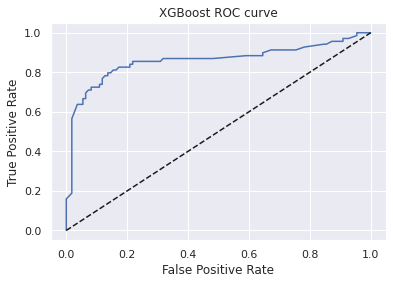

In [58]:
from sklearn.metrics import roc_curve  
probs = xgb_clf.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()